In [4]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.framework import ops
import pandas as pd
%matplotlib inline


#import os
#for dirname, _, filenames in os.walk('/kaggle/input/'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))


In [6]:
Data_set = pd.read_csv('train.csv')
Test_set = pd.read_csv('test.csv')

In [7]:
x_train = Data_set.iloc[:,1:]
y_train = Data_set.iloc[:,0]

In [8]:
# Reshaping
x_train = np.array(x_train).reshape(-1,28,28,1)

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split=0.2
)

train_generator = train_datagen.flow(x_train, y_train, batch_size=64, subset='training')
validation_generator = train_datagen.flow(x_train, y_train, batch_size=64,subset='validation')

In [9]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=[28,28, 1]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=5, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))



# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8

In [10]:
history = cnn.fit(train_generator, validation_data = validation_generator, epochs = 100)

Epoch 1/100
525/525 [==============================] - 37s 69ms/step - loss: 0.4560 - accuracy: 0.8555 - val_loss: 0.1797 - val_accuracy: 0.9426
Epoch 2/100
525/525 [==============================] - 35s 66ms/step - loss: 0.1476 - accuracy: 0.9550 - val_loss: 0.1164 - val_accuracy: 0.9646
Epoch 3/100
525/525 [==============================] - 35s 66ms/step - loss: 0.1037 - accuracy: 0.9682 - val_loss: 0.0926 - val_accuracy: 0.9710
Epoch 4/100
525/525 [==============================] - 34s 66ms/step - loss: 0.0855 - accuracy: 0.9741 - val_loss: 0.0931 - val_accuracy: 0.9699
Epoch 5/100
525/525 [==============================] - 34s 65ms/step - loss: 0.0743 - accuracy: 0.9773 - val_loss: 0.0701 - val_accuracy: 0.9780
Epoch 6/100
525/525 [==============================] - 34s 65ms/step - loss: 0.0681 - accuracy: 0.9786 - val_loss: 0.0739 - val_accuracy: 0.9769
Epoch 7/100
525/525 [==============================] - 34s 66ms/step - loss: 0.0670 - accuracy: 0.9796 - val_loss: 0.0717 - val_ac

525/525 [==============================] - 34s 65ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0410 - val_accuracy: 0.9889
Epoch 58/100
525/525 [==============================] - 34s 65ms/step - loss: 0.0190 - accuracy: 0.9943 - val_loss: 0.0400 - val_accuracy: 0.9892
Epoch 59/100
525/525 [==============================] - 34s 65ms/step - loss: 0.0198 - accuracy: 0.9939 - val_loss: 0.0479 - val_accuracy: 0.9880
Epoch 60/100
525/525 [==============================] - 34s 64ms/step - loss: 0.0212 - accuracy: 0.9934 - val_loss: 0.0387 - val_accuracy: 0.9892
Epoch 61/100
525/525 [==============================] - 35s 66ms/step - loss: 0.0184 - accuracy: 0.9945 - val_loss: 0.0327 - val_accuracy: 0.9907
Epoch 62/100
525/525 [==============================] - 34s 65ms/step - loss: 0.0195 - accuracy: 0.9944 - val_loss: 0.0370 - val_accuracy: 0.9885
Epoch 63/100
525/525 [==============================] - 34s 65ms/step - loss: 0.0179 - accuracy: 0.9945 - val_loss: 0.0484 - val_accuracy

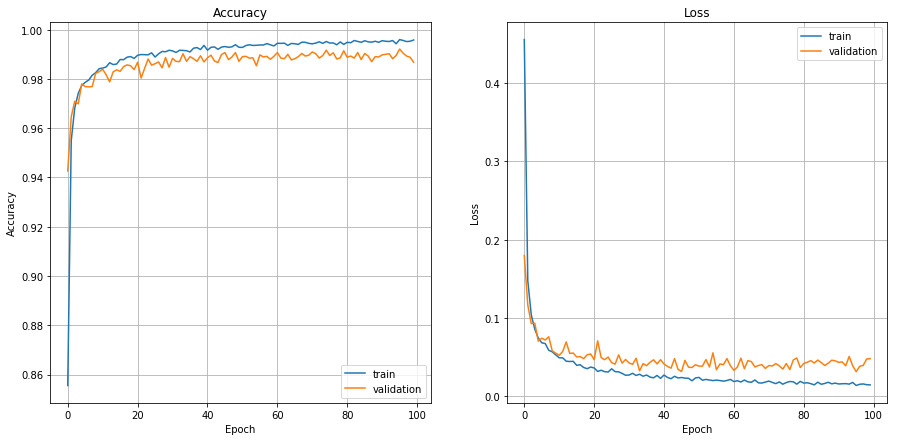

In [11]:
def acc_loss_plot():
    fig, ax = plt.subplots(1,2,figsize=(15,7))
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['train', 'validation'], loc='lower right')
    ax[0].grid()
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['train', 'validation'], loc='upper right')
    ax[1].grid()
    plt.show()

acc_loss_plot()

In [12]:
test = np.array(Test_set).reshape(-1, 28, 28 , 1) / 255

In [13]:
preds = cnn.predict(test)

In [14]:
result = np.argmax(preds,axis=1)

In [15]:
print(result)

[2 0 9 ... 3 9 2]


In [ ]:
#Sub =pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [ ]:
#Sub["Label"] = result

In [ ]:
 #Sub.to_csv('submission.csv', index=False)